In [1]:
import xmlrpc.client
import pickle
import pandas as pd

try:
    server = xmlrpc.client.ServerProxy("http://localhost:8020")
    print("Connected")
except:
    print("No connection")

Connected


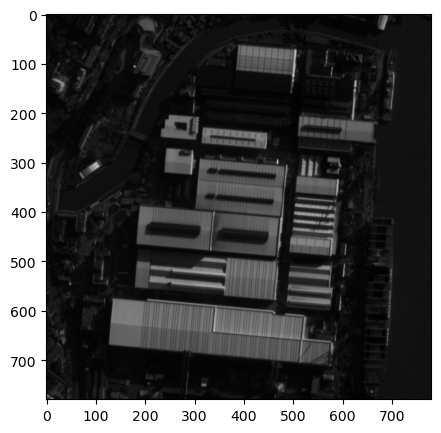

In [2]:
from PIL import Image
import matplotlib.pyplot as plt  # Импорт библиотеки для отображения графиков
import numpy as np

import xmlrpc.client  # Импорт библиотеки xmlrpc.client

# Режим отображения встроенных графиков
%matplotlib inline

img = Image.open('11.bmp') #11.bmp/Jellyfish.jpg

img_arr = np.array(img)

# Исходное изображение
plt.figure(figsize=(10, 5))
plt.imshow(img, cmap='gray') 
plt.show()

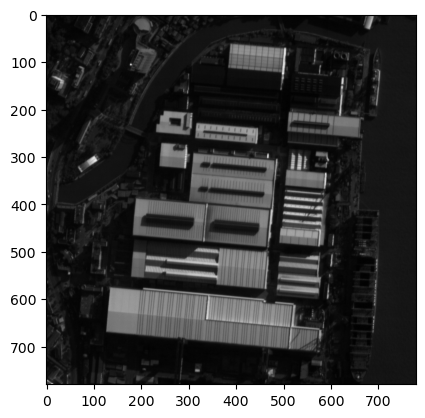

In [3]:
# Тест бинарной передачи данных
import pickle
import xmlrpc.client
import matplotlib.pyplot as plt
import numpy as np

# Тест бинарной передачи данных
pimg = pickle.dumps(img_arr)  # универсально

img_bin = xmlrpc.client.Binary(pimg)

img_bin2 = server.send_back_binary(img_bin)

# img_arr2 = np.loads(img_bin2.data)
img_arr2 = pickle.loads(img_bin2.data)  # универсально

# Изображение после возврата с сервера
plt.imshow(img_arr2, cmap='gray')
plt.show()

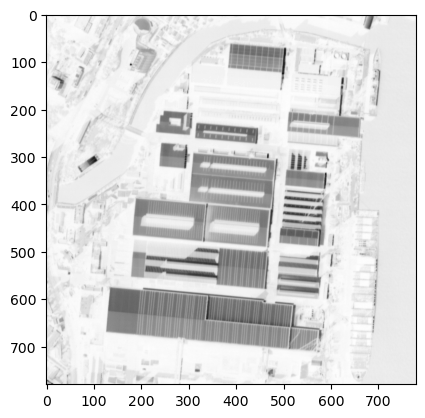

In [4]:
import pickle
import xmlrpc.client
import matplotlib.pyplot as plt

server = xmlrpc.client.ServerProxy("http://localhost:8020")

# Инверсия цвета изображения через сервер
def inv_color(img_arr_in):
    pimg = pickle.dumps(img_arr_in)
    img_bin = xmlrpc.client.Binary(pimg)
    
    img_bin2 = server.send_back_inversion(img_bin)
    
    img_arr_out = pickle.loads(img_bin2.data)
    return img_arr_out

img_arr_inv = inv_color(img_arr)

# Изображение с инверсией цвета
plt.imshow(img_arr_inv, cmap='gray')
plt.show()


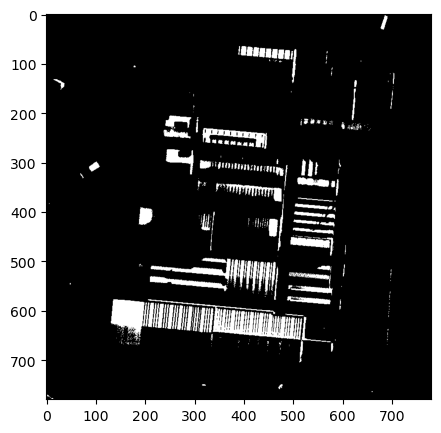

In [5]:
#Бинаризация изображения
import pickle
import xmlrpc.client
import matplotlib.pyplot as plt

server = xmlrpc.client.ServerProxy("http://localhost:8020")

def binarize_img(img_arr_in, threshold):
    img_data = pickle.dumps(img_arr_in)
    binary_img_data = server.threshold_image(xmlrpc.client.Binary(img_data), threshold)
    binary_img_arr = pickle.loads(binary_img_data.data)
    return binary_img_arr

img_arr_bin = binarize_img(img_arr, 100)

plt.figure(figsize=(10, 5))
plt.imshow(img_arr_bin, cmap='gray') # Удаляем размерность 1 для монохромных изображений
plt.show()

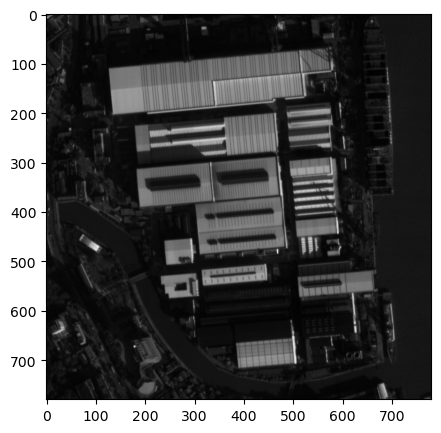

In [6]:
#Разворот изображения относительно вертикали
import pickle
import xmlrpc.client
import matplotlib.pyplot as plt

img_data = pickle.dumps(img_arr)
binary_image = xmlrpc.client.Binary(img_data)
binary_img_data = server.flip_image_vertical(binary_image)

binary_img_arr = pickle.loads(binary_img_data.data)

plt.figure(figsize=(10, 5))
plt.imshow(binary_img_arr, cmap='gray')
plt.show()

In [7]:
import xmlrpc.client

server = xmlrpc.client.ServerProxy("http://localhost:8020")

print(server.black_list_check(u'Петров Петр Петрович', u'07.08.1985'))
print(server.black_list_check(u'Иванов Иван Иванович', u'07.08.1985'))
print(server.black_list_check(u'Петров Иван Петрович', u'07.08.1985'))

Петров Петр Петрович with the date of birth: 07.08.1985: bad_boy
Иванов Иван Иванович with the date of birth: 07.08.1985: good_boy
Петров Иван Петрович with the date of birth: 07.08.1985: good_boy


In [13]:
stats_server = xmlrpc.client.ServerProxy("http://localhost:8018")

logs = stats_server.get_by_event_type('black_list_check')
print("Лог по типу: ", logs)

logs = stats_server.get_in_period('2023-10-24 14:00:00', '2023-10-24 17:15:00')
print("Лог по отрезку времени: ", logs)

logs = stats_server.get_by_duration(5, 15)
print("Лог по длительности: ", logs)

Лог по типу:  [[1, 'black_list_check', '2023-10-24 17:11:03', 1], [2, 'black_list_check', '2023-10-24 17:11:06', 1], [3, 'black_list_check', '2023-10-24 17:11:09', 1], [8, 'black_list_check', '2023-10-24 17:12:28', 1], [9, 'black_list_check', '2023-10-24 17:12:31', 1], [10, 'black_list_check', '2023-10-24 17:12:34', 1]]
Лог по отрезку времени:  [[1, 'black_list_check', '2023-10-24 17:11:03', 1], [2, 'black_list_check', '2023-10-24 17:11:06', 1], [3, 'black_list_check', '2023-10-24 17:11:09', 1], [4, 'send_back_binary', '2023-10-24 17:11:59', 1], [5, 'send_back_inversion', '2023-10-24 17:12:03', 7], [6, 'threshold_image', '2023-10-24 17:12:14', 6], [7, 'flip_image_vertical', '2023-10-24 17:12:23', 1], [8, 'black_list_check', '2023-10-24 17:12:28', 1], [9, 'black_list_check', '2023-10-24 17:12:31', 1], [10, 'black_list_check', '2023-10-24 17:12:34', 1]]
Лог по длительности:  [[5, 'send_back_inversion', '2023-10-24 17:12:03', 7], [6, 'threshold_image', '2023-10-24 17:12:14', 6]]
